# Exploratory Data Analysis

A Bank wants to take care of customer retention for their product; savings accounts. The bank wants you to identify customers likely to churn balances below the minimum balance. You have the customers information such as age, gender, demographics along with their transactions with the bank. Your task as a data scientist would be to predict the propensity to churn for each customer.

This is a classification problem. Class 1 means customers churn their balances i.e. their balances fell below minimum requirement. Class 0 means these were healthy customers

In [1187]:
import numpy as np
import pandas as pd
import seaborn as sns #visualisation library
import matplotlib.pyplot as plt #visualisation library

import warnings
warnings.filterwarnings('ignore')
sns.set(style="white")


# Loading the Dataset

loading the data and checking it's structure

In [1188]:
data = pd.read_csv('.\churn_prediction.csv')

In [1189]:
#viewing first few rows of data
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [1190]:
#looking at shape and columns of dataset
data.shape, data.columns

((28382, 21),
 Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
        'city', 'customer_nw_category', 'branch_code',
        'days_since_last_transaction', 'current_balance',
        'previous_month_end_balance', 'average_monthly_balance_prevQ',
        'average_monthly_balance_prevQ2', 'current_month_credit',
        'previous_month_credit', 'current_month_debit', 'previous_month_debit',
        'current_month_balance', 'previous_month_balance', 'churn'],
       dtype='object'))

They are 28,382 rows and 21 columns. Which means 20 features and 1 target variable

Let's look at few values to know how data looks like. So, we see first row of dataset using iloc function


Pandas provide a unique method to retrieve rows from a Data frame. 
Dataframe.iloc[] method is used when the index label of a data frame is something other than numeric series 
of 0, 1, 2, 3….n or in case the user doesn’t know the index label. Rows can be extracted using an imaginary 
index position which isn’t visible in the data frame.

In [1191]:
data.iloc[0,:]

customer_id                                   1
vintage                                    3135
age                                          66
gender                                     Male
dependents                                    0
occupation                        self_employed
city                                        187
customer_nw_category                          2
branch_code                                 755
days_since_last_transaction                 224
current_balance                         1458.71
previous_month_end_balance              1458.71
average_monthly_balance_prevQ           1458.71
average_monthly_balance_prevQ2          1449.07
current_month_credit                        0.2
previous_month_credit                       0.2
current_month_debit                         0.2
previous_month_debit                        0.2
current_month_balance                   1458.71
previous_month_balance                  1458.71
churn                                   

We have mix of Categorical and numerical variables

Since we have to predict churn, it is our target variable. 

# Target variable exploration

Churn is clearly a binary classification problem. We will find out how many customers are churning using seaborn library

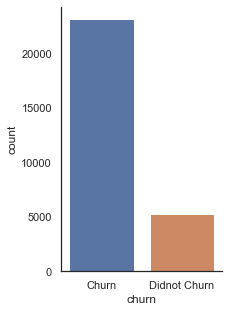

In [1192]:
ax = sns.catplot(x = 'churn', data = data, kind = 'count', height = 4.5, aspect = 0.7)
ax.set_xticklabels(['Churn','Didnot Churn'])

In [1193]:
data['churn'].value_counts(normalize=True)

0    0.814671
1    0.185329
Name: churn, dtype: float64

81.5% customers are churning and 18% are not

# Numerical Features
Notice that we will not directly used dtypes function to identify numerical columns but rather used business sense to select numerical features as we have seen from a smaple record, branch code and city code actually represent categories and not some meaningful numerical value.

In [1194]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

We cannot use these datatypes as reference. Suppose customer ID is stored as integer which is not right. Similarly, city is stored as float but actully each is not. We cannot use this directly, we need to see what are our numerical variable and are not.

For this we need to use our business sense

In [1195]:
numerical_cols = ['customer_id', 'vintage', 'age', 'dependents', 'customer_nw_category', 
                  'days_since_last_transaction', 'current_balance', 'previous_month_end_balance', 
                  'average_monthly_balance_prevQ','average_monthly_balance_prevQ2', 'current_month_credit', 
                 'previous_month_credit','previous_month_debit', 'current_month_debit','current_month_balance',
                 'previous_month_balance']
#describe function to see sepcifics of these numerical variables
data[numerical_cols].describe()

,customer_id,vintage,age,dependents,customer_nw_category,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,previous_month_debit,current_month_debit,current_month_balance,previous_month_balance
count,28382.000000,28382.000000,28382.000000,25919.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04
mean,15143.508667,2364.336446,48.208336,0.347236,2.225530,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.339761e+03,3.658745e+03,7.451133e+03,7.495177e+03
std,8746.454456,1610.124506,17.807163,0.997661,0.660443,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,2.430111e+04,5.198542e+04,4.203394e+04,4.243198e+04
min,1.000000,180.000000,1.000000,0.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03
25%,7557.250000,1121.000000,36.000000,0.000000,2.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03
50%,15150.500000,2018.000000,46.000000,0.000000,2.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,1.099600e+02,9.193000e+01,3.447995e+03,3.465235e+03
75%,22706.750000,3176.000000,60.000000,0.000000,3.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.357553e+03,1.360435e+03,6.667958e+03,6.654693e+03
max,30301.000000,12899.000000,90.000000,52.000000,3.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,1.414168e+06,7.637857e+06,5.778185e+06,5.720144e+06


1. Customers has been with the bank with atleast 6 months and on an average customer stayed with bank for over 6.5 years
2. Most of the people has less than one dependent
3. Customer nw category - They are 3 classes and ordinal variable. Most of the customers are in category 2 and 3

# Customer Networth class and Balance features

In [1196]:
#All balance columns at one place

cols = ['current_balance', 'previous_month_end_balance', 
                  'average_monthly_balance_prevQ','average_monthly_balance_prevQ2', 'current_month_credit', 
                 'previous_month_credit','previous_month_debit', 'current_month_debit','current_month_balance',
                 'previous_month_balance']

#Group balance by customer networth class with their mean values

data.groupby(['customer_nw_category'])[cols].mean()

,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,previous_month_debit,current_month_debit,current_month_balance,previous_month_balance
customer_nw_category,,,,,,,,,,
1,12883.682913,13436.613544,13098.982716,11810.444511,7728.400137,9409.866028,8086.710342,7911.434080,12878.068674,13242.281037
2,7773.279345,7744.492544,7839.095235,7433.073141,3749.500743,2893.806560,3163.730233,3894.684063,7858.371677,7794.672359
3,4795.520175,4957.438675,4947.972060,4959.714499,1401.650598,1535.054349,1851.125018,1758.351527,4873.170891,4954.843500


Category 1 high network customers have high debit and credit balances. It makes since as more credit is available to high network people

# Debit and Credit balance exploration
We have more feature with debit and credit balance, lets start exploring each of them

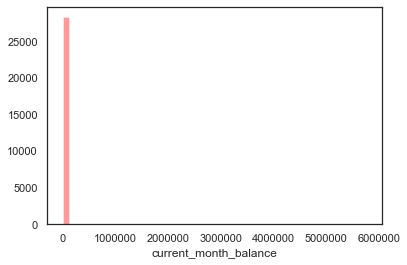

In [1197]:
#univariate plot for current month balance

sns.distplot(data['current_month_balance'], kde = False, color = 'red')

Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved. Univariate analysis can yield misleading results in cases in which multivariate analysis is more appropriate



You can see this is skewed because of lot of outliers and negative balances. Inorder to solve this problem we apply log transaformation. Log doesnt work on negative numbers(not defined). So, we add positive constants. Here If we look at data we have -5500 as minimum it means they are people who had overdrafted their account. so we add 6000 to all numbers and make it positive and then apply log transformation.

In [1198]:
#adding positive numbers
Neg = data['current_month_balance']+6000
Neg.describe()


count    2.838200e+04
mean     1.345113e+04
std      4.203394e+04
min      2.625820e+03
25%      7.996765e+03
50%      9.447995e+03
75%      1.266796e+04
max      5.784185e+06
Name: current_month_balance, dtype: float64

Now you can see there are no negative numbers

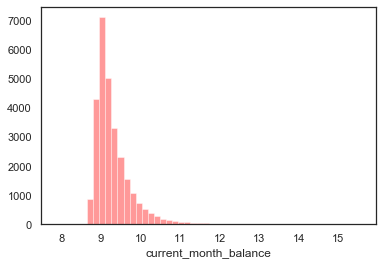

In [1199]:
#Log transformation

Log = np.log(Neg)

#Now univariate plot after log transformation

sns.distplot(Log, kde = False, color = 'red')

Now, we can see more clearly that this is a right skewed feature and we have much more clarity on its distribution. Let us use subplot to quickly look at more numerical features together and see trends.






Now we will check distribution for Current month average balance and Previous month average balance. We now know there are customers with negative balance so we will add positive constants and perform log transformation

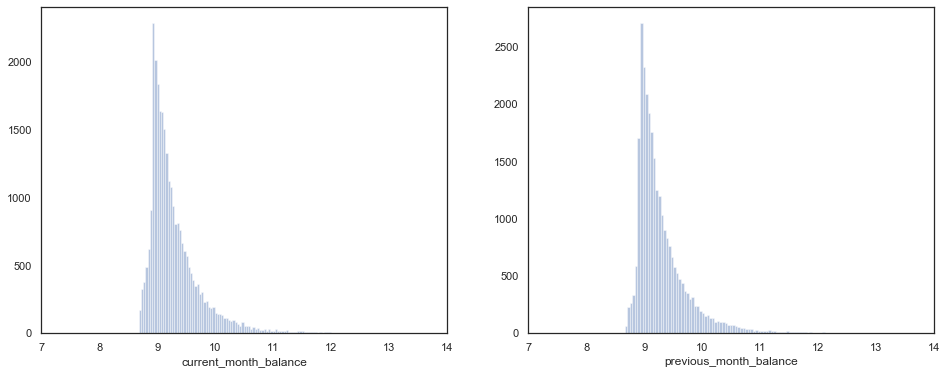

In [1200]:
#log transformation

CMAB = np.log(data['current_month_balance']+6000)
PMAB = np.log(data['previous_month_balance']+6000)

#subplot

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (16,6))


xmin = 7
xmax = 14

ax1.set_xlim([xmin,xmax])
ax2.set_xlim([xmin,xmax])

#setting labels

ax1.set(xlabel = 'log of current month  balance')
ax2.set(xlabel = 'log of previous month balance')

sns.distplot(CMAB, kde = False, ax = ax1, bins = 200)
sns.distplot(PMAB, kde = False, ax = ax2, bins = 200)

plt.show()

As expected the average monthly balance for both months are quite similar and have right skewed histograms as shown. Now let us compare the current month average balance vs current balance as of today

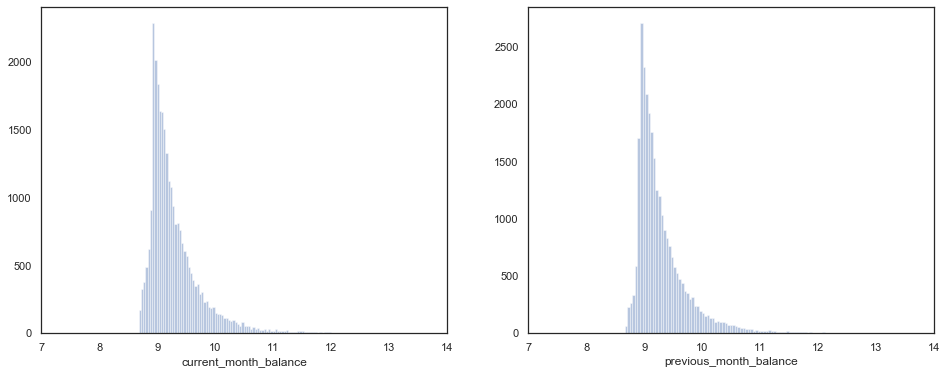

In [1201]:
#log transformation

CMB = np.log(data['current_month_balance']+6000)
CB = np.log(data['current_balance']+6000)

#subplot

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (16,6))


xmin = 7
xmax = 14

ax1.set_xlim([xmin,xmax])
ax2.set_xlim([xmin,xmax])

#setting labels

ax1.set(xlabel = 'log of current month  balance')
ax2.set(xlabel = 'log of current balance')

sns.distplot(CMAB, kde = False, ax = ax1, bins = 200)
sns.distplot(PMAB, kde = False, ax = ax2, bins = 200)

plt.show()

* Here, we can see that the distribution for both lie in almost the same interval, however, there are larger number of values for current balance just below 9 which might have been contributed by the churning customers. 

--We will look at previous month debit and current month debit balance

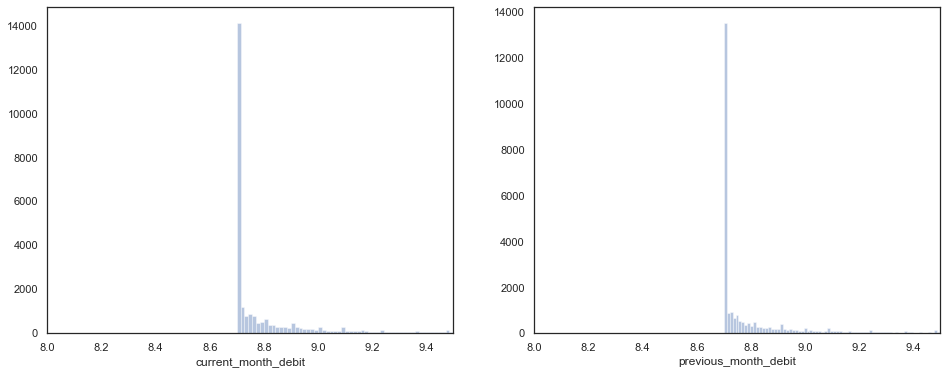

In [1202]:
#log transformation

CMDB = np.log(data['current_month_debit']+6000)
PMDB = np.log(data['previous_month_debit']+6000)

#subplot

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (16,6))


xmin = 8
xmax = 9.5

ax1.set_xlim([xmin,xmax])
ax2.set_xlim([xmin,xmax])

#setting labels

ax1.set(xlabel = 'log of current month debit')
ax2.set(xlabel = 'log of previous month debit')

sns.distplot(CMDB, kde = False, ax = ax1, bins = 500)
sns.distplot(PMDB, kde = False, ax = ax2, bins = 500)

plt.show()

As expected  both months are quite similar and have right skewed histograms as shown. 

# Bivariate Analysis

Now, we will check the relationship of the numeric variables along with the target. Again conversion to log is important here as we have a lot of outliers and visualization will be difficult for it.

In [1203]:
balance_cols = ['current_balance','previous_month_end_balance',
                'current_month_balance', 'previous_month_balance']
df1 = pd.DataFrame()

for i in balance_cols:
    df1[str('log_')+ i] = np.log(data[i] + 6000)

log_balance_cols = df1.columns

In [1204]:
df1.head()

,log_current_balance,log_previous_month_end_balance,log_current_month_balance,log_previous_month_balance
0,8.917138,8.917138,8.917138,8.917138
1,9.340524,9.595920,9.433226,9.601545
2,9.201618,9.377150,9.306221,9.312007
3,9.023036,9.023036,9.023036,8.945045
4,8.843286,8.909468,8.875867,8.946005


In [1205]:
df1['churn']=data['churn']

In [1206]:
df1.head()

,log_current_balance,log_previous_month_end_balance,log_current_month_balance,log_previous_month_balance,churn
0,8.917138,8.917138,8.917138,8.917138,0
1,9.340524,9.595920,9.433226,9.601545,0
2,9.201618,9.377150,9.306221,9.312007,0
3,9.023036,9.023036,9.023036,8.945045,1
4,8.843286,8.909468,8.875867,8.946005,1


* We will use pairplot function from Seaborn which supports displaying relationship between multiple variables. It displays the scatter plot between a pair of feature and also displays the distribution


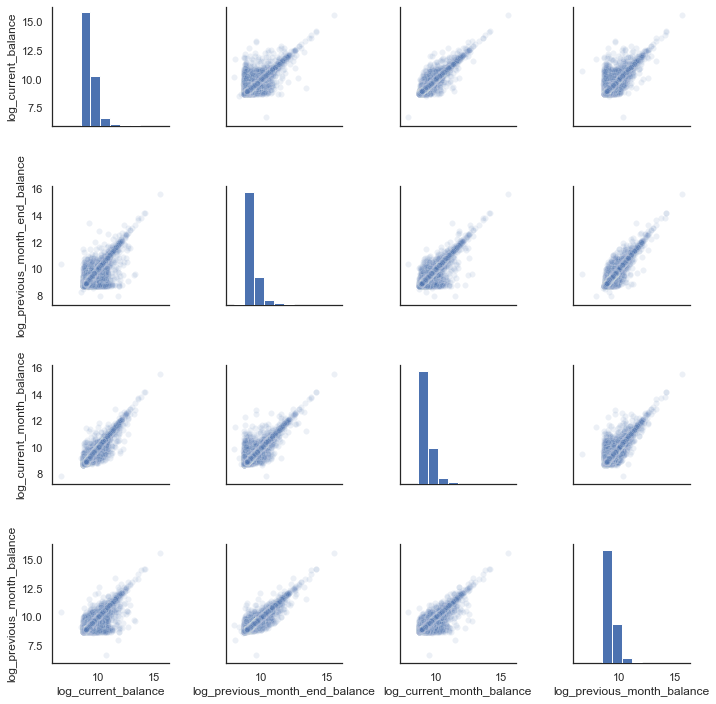

In [1207]:
#sns.pairplot(df1,vars=log_balance_cols, hue = 'churn',plot_kws={'alpha':0.1})
df1_no_churn = df1[df1['churn'] == 0]
sns.pairplot(df1_no_churn,vars=log_balance_cols,plot_kws={'alpha':0.1})
plt.show()

* Diagonal elements shows the distribution of that particular variable on every row.


* Non diagonal elements shows the correlation between two varibales i.e. current balance vs previous balance

* All the variables related to balance seems to have high correlation

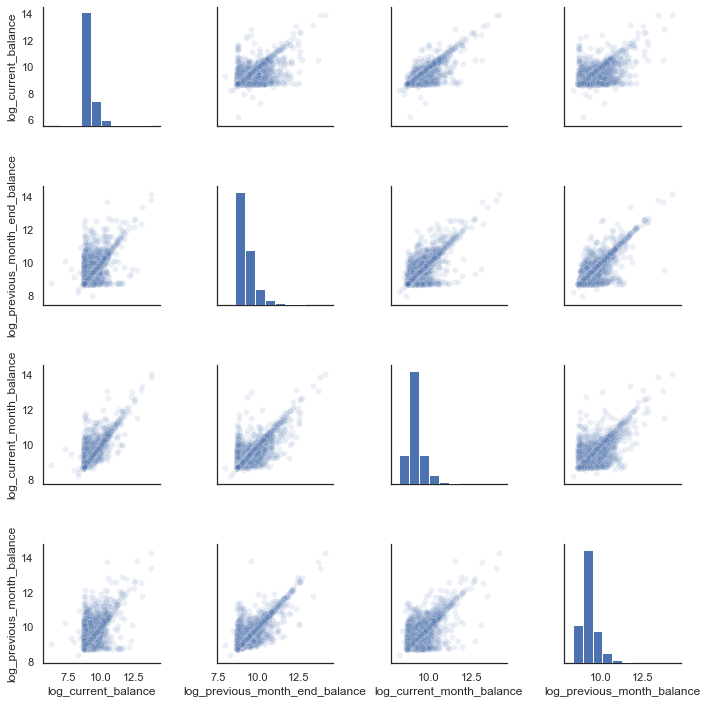

In [1208]:
#plotting for churining customers

df1_churn = df1[df1['churn'] == 1]
sns.pairplot(df1_churn,vars=log_balance_cols,plot_kws={'alpha':0.1})
plt.show()

* We can observce similar behaviour and we continue to see high correlation for churing customers wrt balance



LETS SEE RELATION BTW CHURN AND NON CHURN CLASS

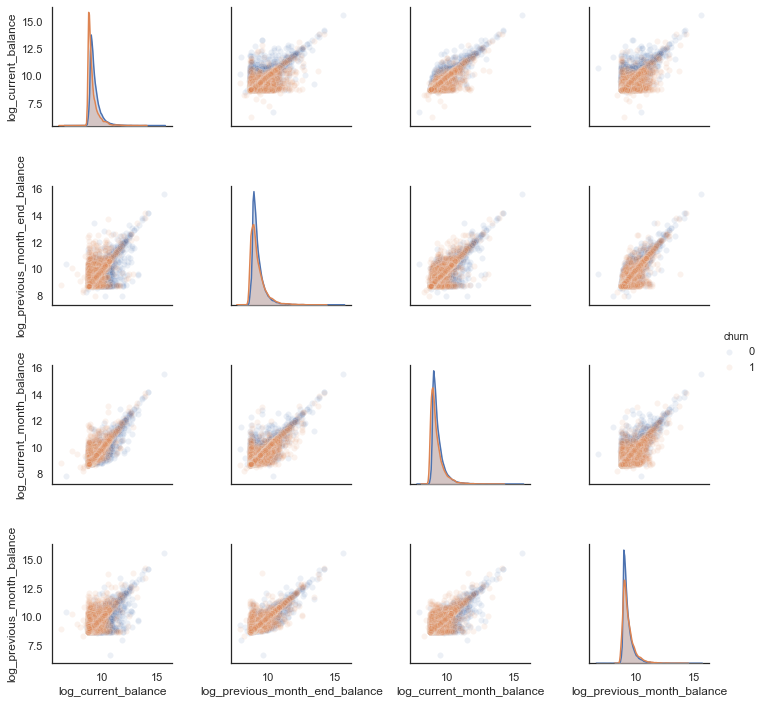

In [1209]:
sns.pairplot(df1,vars=log_balance_cols,hue ='churn',plot_kws={'alpha':0.1})
plt.show()

* There is high correlation between the previous and current month balances which is expected
* The lower balances tend to have higher number of churns which is clear from the scatter plots
* Distribution for the balances are all right skewed


# Debit and Credit balances for current and previous month
bivariate distribution to check relationship

In [1210]:
cr_dr_cols = ['current_month_credit','previous_month_credit', 
              'current_month_debit', 'previous_month_debit']
df2 = pd.DataFrame()

for i in cr_dr_cols:
    df2[str('log_')+ i] = np.log(data[i])

log_cr_dr_cols = df2.columns

In [1211]:
df2['churn'] = data['churn']

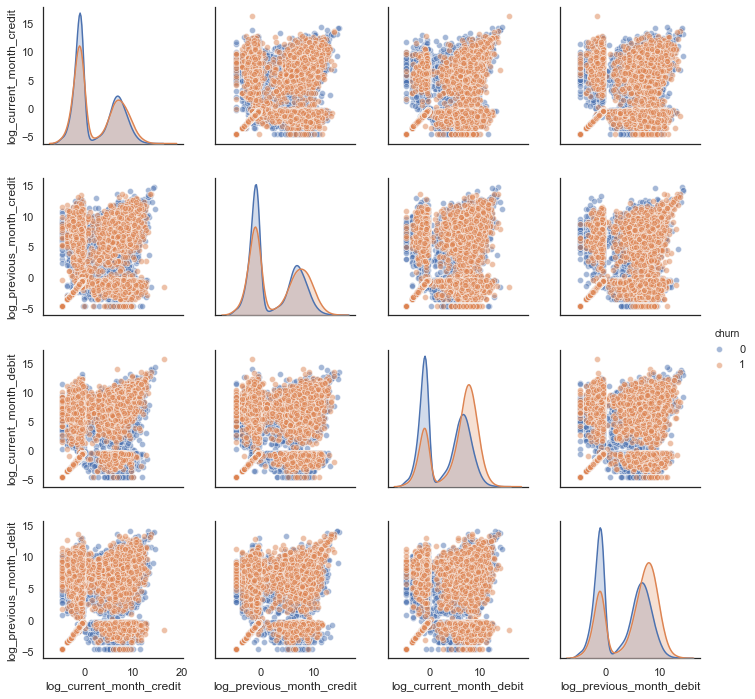

In [1212]:

sns.pairplot(df2,vars=log_cr_dr_cols, hue = 'churn',plot_kws={'alpha':0.5})
plt.show()

Both credit and debit patterns show significant difference in distributions for churned and non churned customers diagonally
* Bimodal distribution/Double Bell Curve shows that there are 2 different types of customers with 2 brackets of credit and debit. Now, during the modeling phase, these could be considered as a seperate set of customers
* For debit values, we see that there is a significant difference in the distribution for churn and non churn and it might be turn out to be an important feature

# Average monthly balance of previous and previous to previous quarters

Now, these 2 variables present deeper historical transactions and would help in understanding the trend during the last 2 quarters

In [1213]:
quarter_cols = ['average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2']
df3 = pd.DataFrame()

for i in quarter_cols:
    df3[str('log_')+ i] = np.log(data[i] + 17000)

log_quarter_cols = df3.columns
df3['churn'] = data['churn']

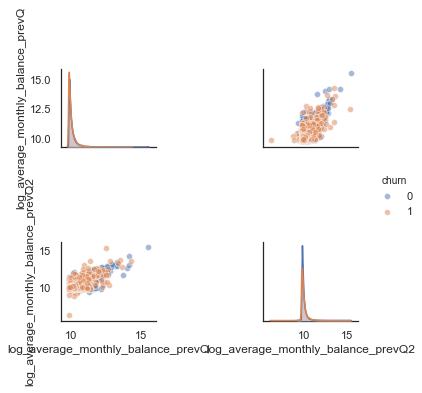

In [1214]:
sns.pairplot(df3,vars=log_quarter_cols, hue = 'churn',plot_kws={'alpha':0.5})
plt.show()

The distributions do not have much difference when it comes to churn. 


However, there are some high negative values in the previous to previous quarters due to which there appears to be a lateral shift. However, if you look at the x-axis, it is still at the same scale for both features.

Removing the extreme outliers from the data using the 1 and 99th percentile would help us look at the correct distributions

In [1215]:
# Remove 1st and 99th percentile and plot as they are outliers. Look close on the plots for outliers

df3 = data[['average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2']]

low = .01
high = .99
quant_df = df3.quantile([low, high])
print(quant_df)

      average_monthly_balance_prevQ  average_monthly_balance_prevQ2
0.01                      1449.0377                        121.6485
0.99                     60118.2288                      59357.8810


In [1216]:
df4 = df3.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)

In [1217]:
q_cols = ['average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2']
df5 = pd.DataFrame()

for i in q_cols:
    df5[str('log_')+ i] = np.log(df4[i] + 17000)

log_q_cols = df5.columns
df5['churn'] = data['churn']

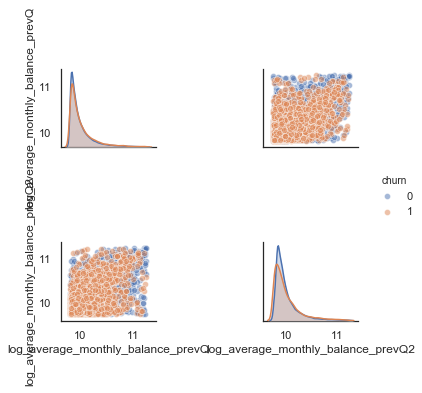

In [1218]:
sns.pairplot(df5,vars=log_q_cols, hue = 'churn',plot_kws={'alpha':0.5})
plt.show()

Now, we can clearly see that the distributions are very similar for both the variables and and non churning customers have higher average monthly balances in previous 2 quarters

# We will use demographic and bank related information

Days since last transaction

KDE plot can be used for numerical variables on the same axis to quickly compare the distributions for churning and non churning customers. It basically plots the approximate churn rate against each normal variable. This is exactly similar to what we did in the pairplot with distributions but here we would look at them separately since they represent entirely different variables

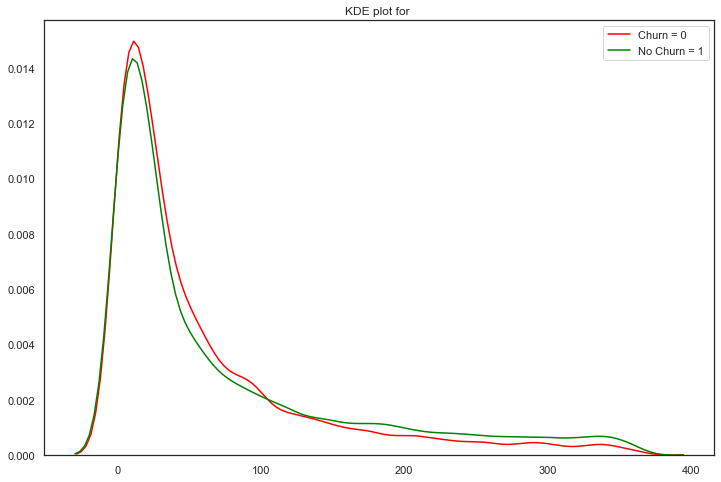

In [1219]:
#KDe plot

def kdeplot(features):
    plt.figure(figsize=(12,8))
    plt.title('KDE plot for ')
    sns.kdeplot(data[data['churn']==1][features].dropna(), color = 'red', label = 'Churn = 0')
    sns.kdeplot(data[data['churn']==0][features].dropna(),color = 'green', label = 'No Churn = 1')
    
    
kdeplot('days_since_last_transaction')

There is no significant difference between the distributions for churning and non churning customers when it comes to days since last transaction.

# Age and Vintage

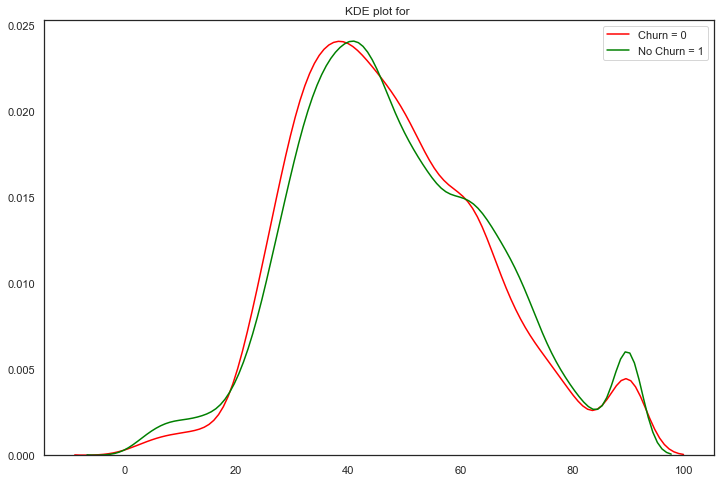

In [1220]:
kdeplot('age')

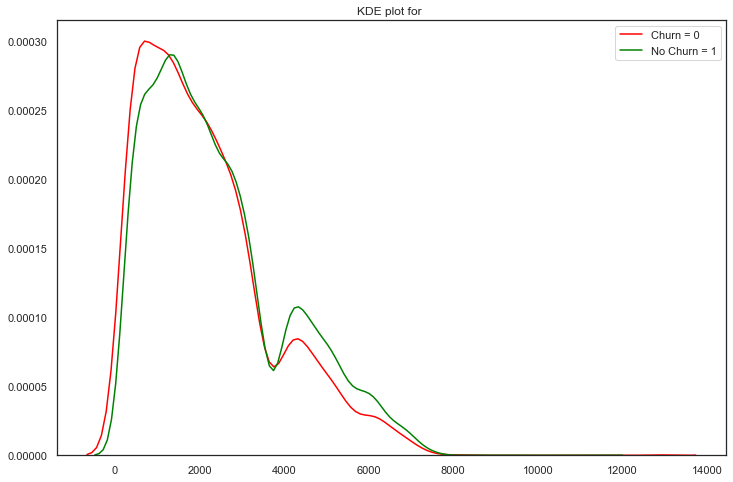

In [1221]:
kdeplot('vintage')

* Similarly, age also does not significantly affect the churning rate. However, customers above 80 years of age less likely to churn
* For most frequent vintage values, the churning customers are slightly higher, while for higher values of vintage, we have mostly non churning customers which is in sync with the age variable 

# Categorical Variables 

In [1222]:
cat_columns = ['gender', 'occupation', 'city','branch_code']
data['city'].nunique()

1604

In [1223]:
for i in range(0,len(cat_columns)):
    print(str(cat_columns[i]) + " - Number of Unique Values: " + str(data[cat_columns[i]].nunique()))

gender - Number of Unique Values: 2
occupation - Number of Unique Values: 5
city - Number of Unique Values: 1604
branch_code - Number of Unique Values: 3185


## Categorical Univariate Analysis

Text(-6.289999999999999, 0.5, 'Number of occurances')

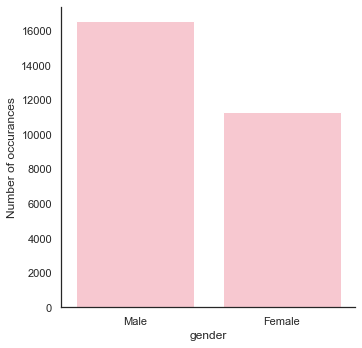

In [1224]:
#Gender
sns.catplot(x = 'gender',data = data, kind ='count', color = 'pink')
plt.ylabel('Number of occurances')

Text(0.5, 8.95999999999998, 'Occupation Category')

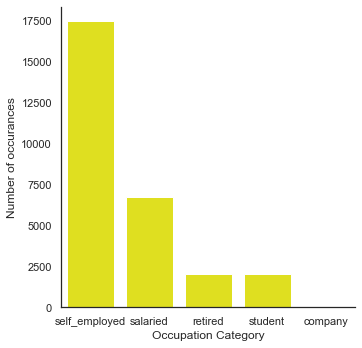

In [1225]:
sns.catplot(x = 'occupation', data = data, kind = 'count', color = 'yellow')

plt.ylabel('Number of occurances')
plt.xlabel('Occupation Category')

Most of the customers are self employed, followed by salaried account holders, retired custumors and very low number of companies.

In [1226]:
#cities
data['city'].value_counts().unique()

array([3479, 2016, 1334, 1291, 1138,  930,  840,  778,  669,  631,  375,
        345,  312,  289,  281,  251,  245,  240,  237,  227,  197,  187,
        166,  150,  133,  130,  119,  114,  109,  107,  104,  101,   99,
         97,   95,   85,   81,   75,   74,   72,   69,   68,   67,   66,
         65,   63,   60,   58,   57,   56,   53,   51,   50,   47,   46,
         45,   44,   43,   42,   41,   40,   39,   37,   36,   35,   34,
         33,   32,   31,   30,   29,   28,   27,   26,   25,   24,   23,
         22,   21,   20,   19,   18,   17,   16,   15,   14,   13,   12,
         11,   10,    9,    8,    7,    6,    5,    4,    3,    2,    1],
      dtype=int64)

In [1227]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [1228]:
data['city'].value_counts().head(25)

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
334.0      930
1232.0     840
623.0      778
15.0       669
575.0      631
1525.0     375
905.0      345
491.0      312
1111.0     312
1494.0     289
649.0      281
1589.0     251
318.0      245
1084.0     240
61.0       237
531.0      227
656.0      197
904.0      187
630.0      166
1181.0     150
Name: city, dtype: int64

In [1229]:
#we create 3 bins with based on populaqtion of each city

data['city_bin'] = data['city'].copy()

counts = data['city'].value_counts()
data['city_bin'][data['city'].isin(counts[counts>900].index)]=3
data['city_bin'][data['city'].isin(counts[counts<900].index) & data['city'].isin(counts[counts>=350].index)] = 2
data['city_bin'][data['city'].isin(counts[counts<350].index) & data['city'].isin(counts[counts>=100].index)] = 1
data['city_bin'][data['city'].isin(counts[counts<100].index)]=0

data['city_bin'] = pd.to_numeric(data['city_bin'], errors = 'coerce')

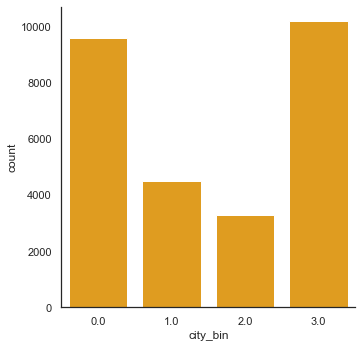

In [1230]:
sns.catplot(x = 'city_bin', data= data, kind = 'count', color = 'orange')

There are 2 major categories here. Cities with more than 900 occurances and with less than 100 occurances.

In [1231]:
data.groupby('age')

In [1232]:
def barplot_percentage(feature):
    ax1 = data.groupby(feature)['churn'].value_counts(normalize= True).unstack()
    
    ax1.plot(kind='bar', stacked = 'True')
    int_level = data[feature].value_counts()
    plt.figure(figsize=(8,4))
    sns.barplot(int_level.index, int_level.values, alpha=0.8)
    plt.show

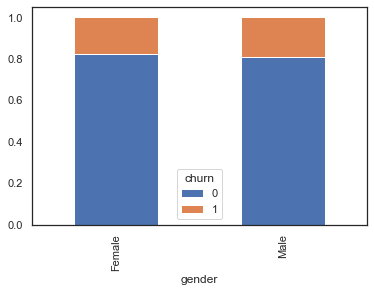

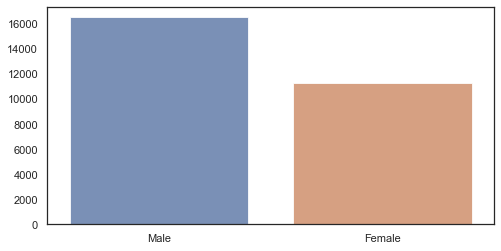

In [1233]:
barplot_percentage('gender')

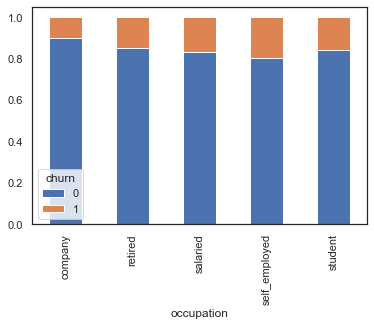

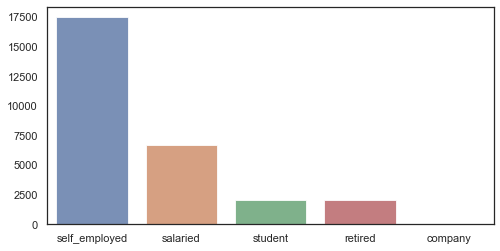

In [1234]:
barplot_percentage('occupation')

Selfemployed has higest churn and most of our custmers are selfemployed

In [1235]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn', 'city_bin'],
      dtype='object')

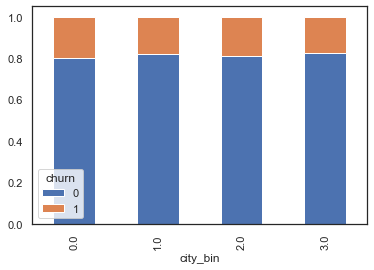

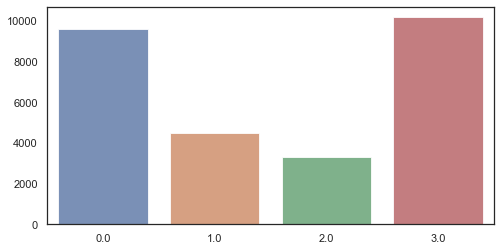

In [1236]:
barplot_percentage('city_bin')

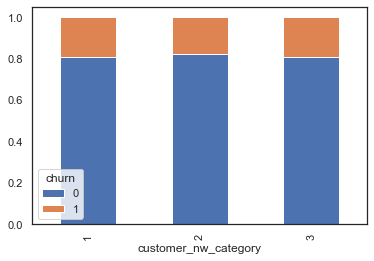

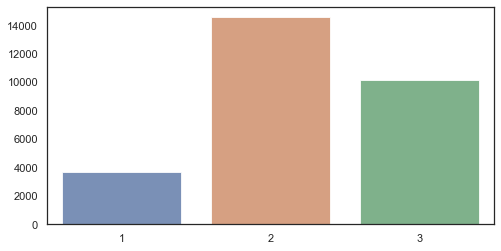

In [1237]:
barplot_percentage('customer_nw_category')

In [1238]:
data['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [1239]:
data['dependents'][data['dependents']>3]=3

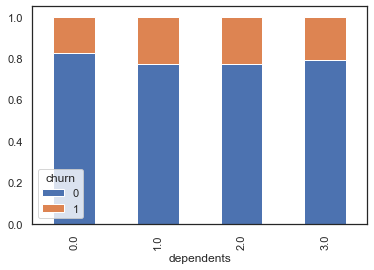

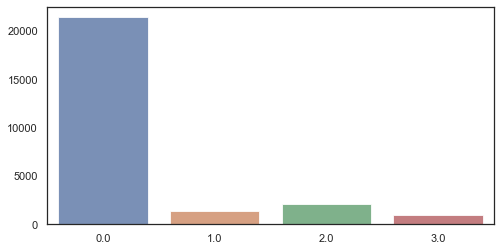

In [1240]:
barplot_percentage('dependents')

### Correlation Heatmap

In [1241]:
data.drop(['customer_id'], axis = 1, inplace = True)

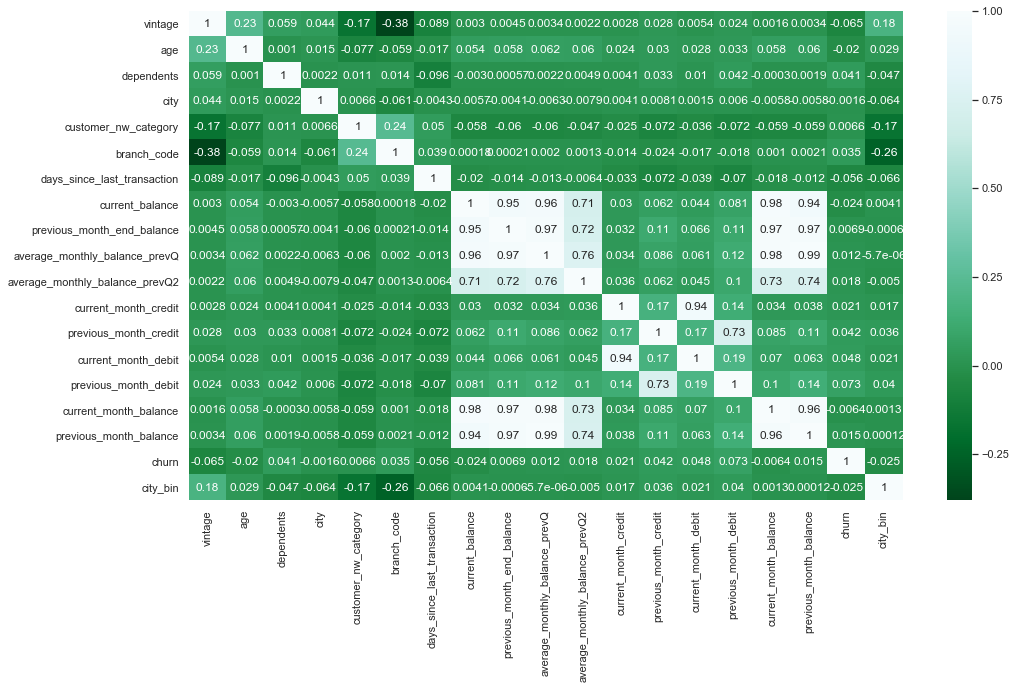

In [1242]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot = True, cmap = 'BuGn_r')


#### Average customer Profile
Overall a customer at this bank:
* has no dependents
* has been a customer for last 6 years
* predominantly male
* either self employed or salaried customer

#### Conclusion 
* From the sample, around 17% customers are churning
* Current balance and average monthly balance values have a left skewed distribution as observed from the histogram
* No significant difference in distributions for average monthly balance and month end balances
* Bimodal distribution/Double Bell Curve shows that there are 2 different types of customers with 2 brackets of credit and debit. Now, during the modeling phase, these could be considered as a seperate set of customers
* For debit values, we see that there is a significant difference in the distribution for churn and non churn and it might be turn out to be an important feature
* For most frequent vintage values, the churning customers are slightly higher, while for higher values of vintage, we have mostly non churning customers which is in sync with the age variable 
* Gender does not look like a very significant variable as the ratio of churned customers and others is very similar
* Self Employed and salaried have higher churn rate and are the most frequently occuring categories.
* Not much difference in customer net worth category when it comes to churn

# Churn Prediction - Logistic Regression
##### Churn means customer falls below the  minimum balance requirement

* Preprocessing
* Preprocessing & Missing value imputation
* Select features on the basis of EDA Conclusions & build baseline model
* Decide Evaluation Metric on the basis of business problem
* Build model using all features & compare with baseline
* Use Reverse Feature Elimination to find the top features and build model using the top 10 features & compare

In [1243]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

### Missing Values 

In [1244]:
data.isnull().sum()

vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
city_bin                           803
dtype: int64

There are quite a few missing values in columns gender, dependents, occupation,city, and days since last transaction. Let us go through each of them 1 by 1 to find the appropriate missing value imputation strategy for each of them.

#### Gender

 We know from exploration that majority are males. We can either use mode as imputation or create a third variable.

In [1245]:
data['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [1246]:
#We are imputing using mode function
data['gender']=data['gender'].fillna('Male')
data['gender'].value_counts()

Male      17073
Female    11309
Name: gender, dtype: int64

#### Dependents

Majority of of customers have no dependents i.e. 0

In [1247]:
data['dependents'].value_counts()

0.0    21435
2.0     2150
1.0     1395
3.0      939
Name: dependents, dtype: int64

In [1248]:
#Imputing using mode
data['dependents'] = data['dependents'].fillna(0)
data['dependents'].value_counts()

0.0    23898
2.0     2150
1.0     1395
3.0      939
Name: dependents, dtype: int64

#### Occupation

From the data exploration we found that majority of our customers are selfemployes, So we impute using mode

In [1249]:
data['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [1250]:
#imputing using mode
data['occupation'] = data['occupation'].fillna('self_employed')
data['occupation'].value_counts()

self_employed    17556
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

#### City

Similarly City can be imputed with mode i.e. 1020 category

In [1251]:
data['city'] = data['city'].fillna(1020)


#### Days since last transaction

Highest number of days since last transaction is 321 days i.e. its fair to assume that missing customers must not have performed any kind of transaction since last one year.
I will Assume days as 600 days which is more than a year.

In [1252]:
data['days_since_last_transaction'] = data['days_since_last_transaction'].fillna(600)

# Preprocessing

Before Applying any linear/Regression Models, we need to keep all the data in numerics

Converting categorical to numberic by using dummy function

In [1253]:
data = pd.concat([data, pd.get_dummies(data['occupation'], prefix = str('occupation'), prefix_sep = '_')],axis = 1)
data.head()


,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,previous_month_debit,current_month_balance,previous_month_balance,churn,city_bin,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,...,0.20,1458.71,1458.71,0,0.0,0,0,0,1,0
1,310,35,Male,0.0,self_employed,1020.0,2,3214,60.0,5390.37,...,100.56,6496.78,8787.61,0,NaN,0,0,0,1,0
2,2356,31,Male,0.0,salaried,146.0,2,41,600.0,3913.16,...,259.23,5006.28,5070.14,0,3.0,0,0,1,0,0
3,478,90,Male,0.0,self_employed,1020.0,2,582,147.0,2291.91,...,2143.33,2291.91,1669.79,1,3.0,0,0,0,1,0
4,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,927.72,...,1538.06,1157.15,1677.16,1,1.0,0,0,0,1,0


In [1254]:
data = pd.concat([data,pd.get_dummies(df['gender'])],axis=1)
data

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,previous_month_balance,churn,city_bin,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,Female,Male
0,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,...,1458.71,0,0.0,0,0,0,1,0,0,1
1,310,35,Male,0.0,self_employed,1020.0,2,3214,60.0,5390.37,...,8787.61,0,NaN,0,0,0,1,0,0,1
2,2356,31,Male,0.0,salaried,146.0,2,41,600.0,3913.16,...,5070.14,0,3.0,0,0,1,0,0,0,1
3,478,90,Male,0.0,self_employed,1020.0,2,582,147.0,2291.91,...,1669.79,1,3.0,0,0,0,1,0,0,1
4,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,927.72,...,1677.16,1,1.0,0,0,0,1,0,0,1
5,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,15202.20,...,15349.75,0,3.0,0,0,0,1,0,1,0
6,5922,72,Male,0.0,retired,1020.0,1,1,98.0,7006.93,...,7755.98,0,3.0,0,1,0,0,0,0,1
7,1145,46,Male,0.0,self_employed,623.0,2,317,172.0,10096.58,...,5317.04,0,2.0,0,0,0,1,0,0,1
8,2132,31,Male,0.0,salaried,1096.0,2,4110,19.0,1355.86,...,1857.42,0,3.0,0,0,1,0,0,0,1
9,3379,40,Male,3.0,self_employed,1020.0,2,38,0.0,4957.95,...,2416.69,0,3.0,0,0,0,1,0,0,1


In [1255]:
data = data.drop(['gender'],axis=1)

In [1256]:
data = data.drop(['city_bin'],axis=1)

## Scaling the features

We will do 2 things here
1. In exploration we have used Log transformation after bringing all balances to positives
2. Standard Scaler - to bring all numeric features on the same scale

In [1257]:
num_cols = ['customer_nw_category', 'current_balance',
            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance']
for i in num_cols:
    data[i] = np.log(data[i]+17000) #Since all values are noty positiives and log doesnt work on negatiives
    
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

In [1258]:
scaled.head()

,customer_nw_category,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,average_monthly_balance_prevQ,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,-0.341470,-0.613738,-0.632367,-0.630646,-0.697612,-0.313931,-0.324487,-0.368251,-0.377390,-0.653455,-0.666207
1,-0.341470,0.011267,0.446458,0.949414,0.317595,-0.313852,-0.324410,0.640986,-0.355677,0.149440,0.455680
2,-0.341470,-0.209651,0.057975,-0.388637,-0.108263,-0.313841,-0.324400,0.729825,-0.321607,-0.068597,-0.066642
3,-0.341470,-0.470836,-0.488530,-0.712855,-0.582976,-0.313872,-0.324429,-0.368193,0.060593,-0.506570,-0.628056
4,1.172658,-0.708214,-0.642441,-0.554058,-0.663399,-0.313902,-0.175104,-0.245463,-0.057927,-0.708257,-0.626732


In [1259]:
data_org = data.copy()
data_org.head()

,vintage,age,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,Female,Male
0,3135,66,0.0,self_employed,187.0,9.741086,755,224.0,9.823292,9.823292,...,9.823292,9.823292,0,0,0,0,1,0,0,1
1,310,35,0.0,self_employed,1020.0,9.741086,3214,60.0,10.016386,10.154428,...,10.064619,10.157649,0,0,0,0,1,0,0,1
2,2356,31,0.0,salaried,146.0,9.741086,41,600.0,9.948134,10.035186,...,9.999083,10.001981,0,0,0,1,0,0,0,1
3,478,90,0.0,self_employed,1020.0,9.741086,582,147.0,9.867441,9.867441,...,9.867441,9.834662,1,0,0,0,1,0,0,1
4,2531,42,2.0,self_employed,1494.0,9.741145,388,58.0,9.794103,9.820199,...,9.806820,9.835057,1,0,0,0,1,0,0,1


In [1260]:
#dropping unscaled feature from dataset and merging scaled features inplace of unscaled

data = data.drop(columns = num_cols, axis = 1)
data = data.merge(scaled, left_index  = True, right_index = True, how = 'left')

data.head()

,vintage,age,dependents,occupation,city,branch_code,days_since_last_transaction,churn,occupation_company,occupation_retired,...,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,average_monthly_balance_prevQ,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,3135,66,0.0,self_employed,187.0,755,224.0,0,0,0,...,-0.613738,-0.632367,-0.630646,-0.697612,-0.313931,-0.324487,-0.368251,-0.377390,-0.653455,-0.666207
1,310,35,0.0,self_employed,1020.0,3214,60.0,0,0,0,...,0.011267,0.446458,0.949414,0.317595,-0.313852,-0.324410,0.640986,-0.355677,0.149440,0.455680
2,2356,31,0.0,salaried,146.0,41,600.0,0,0,0,...,-0.209651,0.057975,-0.388637,-0.108263,-0.313841,-0.324400,0.729825,-0.321607,-0.068597,-0.066642
3,478,90,0.0,self_employed,1020.0,582,147.0,1,0,0,...,-0.470836,-0.488530,-0.712855,-0.582976,-0.313872,-0.324429,-0.368193,0.060593,-0.506570,-0.628056
4,2531,42,2.0,self_employed,1494.0,388,58.0,1,0,0,...,-0.708214,-0.642441,-0.554058,-0.663399,-0.313902,-0.175104,-0.245463,-0.057927,-0.708257,-0.626732


In [1261]:
data_churn_col = data['churn'].copy()

In [1262]:
#Dropping irrelevant columns
data = data.drop(['churn','occupation'], axis =1)

In [1263]:
data.head()

,vintage,age,dependents,city,branch_code,days_since_last_transaction,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,...,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,average_monthly_balance_prevQ,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,3135,66,0.0,187.0,755,224.0,0,0,0,1,...,-0.613738,-0.632367,-0.630646,-0.697612,-0.313931,-0.324487,-0.368251,-0.377390,-0.653455,-0.666207
1,310,35,0.0,1020.0,3214,60.0,0,0,0,1,...,0.011267,0.446458,0.949414,0.317595,-0.313852,-0.324410,0.640986,-0.355677,0.149440,0.455680
2,2356,31,0.0,146.0,41,600.0,0,0,1,0,...,-0.209651,0.057975,-0.388637,-0.108263,-0.313841,-0.324400,0.729825,-0.321607,-0.068597,-0.066642
3,478,90,0.0,1020.0,582,147.0,0,0,0,1,...,-0.470836,-0.488530,-0.712855,-0.582976,-0.313872,-0.324429,-0.368193,0.060593,-0.506570,-0.628056
4,2531,42,2.0,1494.0,388,58.0,0,0,0,1,...,-0.708214,-0.642441,-0.554058,-0.663399,-0.313902,-0.175104,-0.245463,-0.057927,-0.708257,-0.626732


### Conclusions from EDA
* For debit values, we see that there is a significant difference in the distribution for churn and non churn and it might be turn out to be an important feature
* We have seen high correlation for balance variables
* For new vintage values, the churning customers are slightly higher. 
* Occupation might be interesting to use as a feature because of the its significant differences in them

Now, we will first split our dataset into test and train and using the above conclusions select columns and build a baseline logistic regression model to check the ROC-AUC Score & the confusion matrix

# Model Evaluation Metrics

Since this is a binary classification problem we can use Recall and AUC-ROC metrics

Recall because you can't miss the churning customer
while AUC ROC Score would take care of how well predicted probabilites are able to differentiate between the 2 classes.

#### First we will build baseline logistic regression to check AUC-ROC curve and confusion matrix

#### Baseline columns
* The variables are from conclusion we drawn 

In [1264]:
#Baseline Columns

baseline_cols = ['current_month_debit', 'previous_month_debit','current_balance','previous_month_end_balance','vintage'
                 ,'occupation_retired', 'occupation_salaried','occupation_self_employed', 'occupation_student']
baseline_cols

['current_month_debit',
 'previous_month_debit',
 'current_balance',
 'previous_month_end_balance',
 'vintage',
 'occupation_retired',
 'occupation_salaried',
 'occupation_self_employed',
 'occupation_student']

In [1265]:
data_baseline = data[baseline_cols]

In [1266]:
data_churn_col.shape, data_baseline.shape

((28382,), (28382, 9))

### Creating train test split to create validation set

In [1267]:
train_x, test_x, train_y,test_y = train_test_split(data_baseline, data_churn_col, stratify = data_churn_col, random_state = 11)

In [1268]:
LR = LogisticRegression()
LR.fit(train_x,train_y)
predict = LR.predict_proba(test_x)[:,1] #proba is going to give us probabilty

### AUC-ROC and confusion matrix
* We now have probabilties, We plot AUC-ROC and Confusion matrix

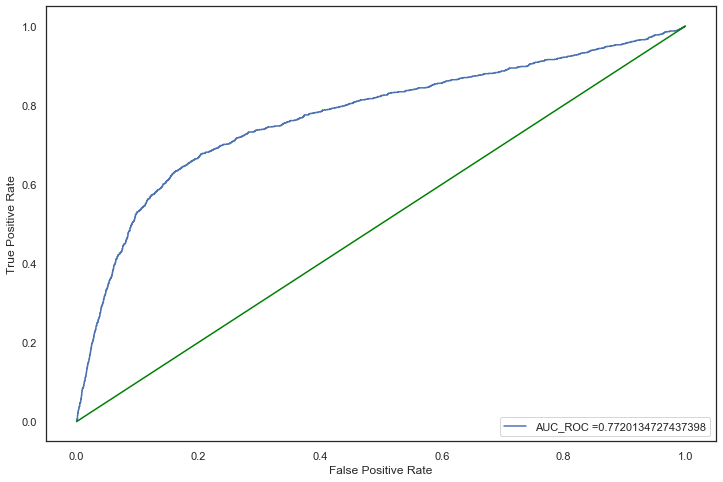

In [1269]:
from sklearn.metrics import roc_curve
fpr, tpr, _ =roc_curve(test_y, predict)
auc = roc_auc_score(test_y, predict)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label = 'AUC_ROC ='+str(auc))
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
#For plotting straight line
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-', color='green')
plt.show()

###### Confusion MAtrix

In [1270]:
pred_conf = LR.predict(test_x)

In [1271]:
conf = confusion_matrix(test_y, pred_conf)

In [1272]:
conf

array([[5684,   97],
       [1141,  174]], dtype=int64)

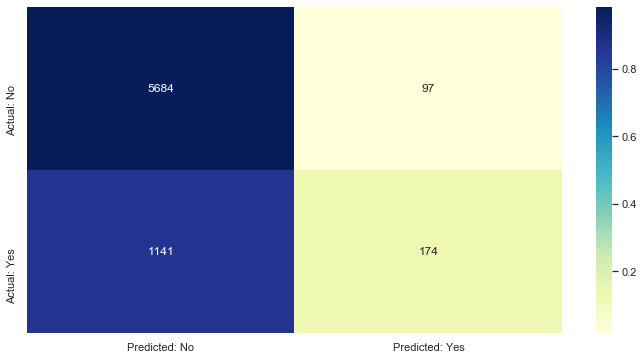

In [1273]:
def plot_confusion_matrix(conf, normalized = True, cmap = 'YlGnBu'):
    plt.figure(figsize=(12,6))
    norm_conf = conf
    if normalized:
        norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis] #axis 1 because it's recall, for precision '0'
        sns.heatmap(norm_conf, annot=conf, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(conf, normalized = True)
    

In [1274]:
recall_score(test_y, pred_conf)

0.132319391634981

#### Cross Validation  

We divide the entire population into k equal samples. Now we train models on k-1 samples and validate on 1 sample. Then, at the second iteration we train the model with a different sample held as validation. 

In k iterations, we have basically built model on each sample and held each of them as validation. This is a way to reduce the selection bias and reduce the variance in prediction power.

In [1275]:
def cv_score(ml_model, rstate = 12, thres = 0.5, cols = data.columns):
    i = 1
    cv_scores = []
    df2 = data.copy()
    df2 = df2[cols]
    
    # 5 Fold cross validation stratified on the basis of target
    kf = StratifiedKFold(n_splits=5,random_state=rstate,shuffle=True)
    for data_index,test_index in kf.split(df2,data_churn_col):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = df2.loc[data_index],df2.loc[test_index]
        ytr,yvl = data_churn_col.loc[data_index],data_churn_col.loc[test_index]
            
        # Define model for fitting on the training set for each fold
        model = ml_model
        model.fit(xtr, ytr)
        pred_probs = model.predict_proba(xvl)
        pp = []
         
        # Use threshold to define the classes based on probability values
        for j in pred_probs[:,1]:
            if j>thres:
                pp.append(1)
            else:
                pp.append(0)
         
        # Calculate scores for each fold and print
        pred_val = pp
        roc_score = roc_auc_score(yvl,pred_probs[:,1])
        recall = recall_score(yvl,pred_val)
        precision = precision_score(yvl,pred_val)
        sufix = ""
        msg = ""
        msg += "ROC AUC Score: {}, Recall Score: {:.4f}, Precision Score: {:.4f} ".format(roc_score, recall,precision)
        print("{}".format(msg))
         
         # Save scores
        cv_scores.append(roc_score)
        i+=1
    return cv_scores

In [1276]:
baseline_scores = cv_score(LogisticRegression(), cols = baseline_cols)


1 of kfold 5
ROC AUC Score: 0.7676540951597985, Recall Score: 0.1245, Precision Score: 0.6453 

2 of kfold 5
ROC AUC Score: 0.7683635803103483, Recall Score: 0.1359, Precision Score: 0.6714 

3 of kfold 5
ROC AUC Score: 0.771339728577631, Recall Score: 0.1321, Precision Score: 0.6178 

4 of kfold 5
ROC AUC Score: 0.7688323526122594, Recall Score: 0.1312, Precision Score: 0.6699 

5 of kfold 5
ROC AUC Score: 0.7579209398476456, Recall Score: 0.1236, Precision Score: 0.6341 


###### Now let us try using all columns available to check if we get significant improvement.

In [1277]:
all_scores = cv_score(LogisticRegression())


1 of kfold 5
ROC AUC Score: 0.7919231322577331, Recall Score: 0.2120, Precision Score: 0.7288 

2 of kfold 5
ROC AUC Score: 0.794178193402528, Recall Score: 0.2253, Precision Score: 0.7096 

3 of kfold 5
ROC AUC Score: 0.807086436117726, Recall Score: 0.2376, Precision Score: 0.7418 

4 of kfold 5
ROC AUC Score: 0.7957881346454931, Recall Score: 0.2063, Precision Score: 0.7209 

5 of kfold 5
ROC AUC Score: 0.7944210730590602, Recall Score: 0.1996, Precision Score: 0.7192 


There is some improvement in both ROC AUC Scores and Precision/Recall Scores. Now we can try backward selection to select the best subset of features which give the best score. 

### Reverse Feature Elimination 


In [1278]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Create the RFE object and rank each feature
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(data, data_churn_col)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=1, step=1, verbose=0)

In [1279]:
ranking_data = pd.DataFrame()
ranking_data['Feature_name'] = data.columns
ranking_data['Rank'] = rfe.ranking_


In [1280]:
ranked = ranking_data.sort_values(by=['Rank'])
ranked

,Feature_name,Rank
14,current_balance,1
17,average_monthly_balance_prevQ,2
6,occupation_company,3
11,Female,4
12,Male,5
16,average_monthly_balance_prevQ2,6
22,current_month_balance,7
23,previous_month_balance,8
7,occupation_retired,9
20,current_month_debit,10


Selecting top 10 features

In [1281]:
top_10_scores = cv_score(LogisticRegression(), cols = ranked['Feature_name'][:10].values)


1 of kfold 5
ROC AUC Score: 0.7879576610831364, Recall Score: 0.2091, Precision Score: 0.7190 

2 of kfold 5
ROC AUC Score: 0.7943660466550201, Recall Score: 0.2053, Precision Score: 0.7152 

3 of kfold 5
ROC AUC Score: 0.8103044785348719, Recall Score: 0.2186, Precision Score: 0.7278 

4 of kfold 5
ROC AUC Score: 0.7935593103266805, Recall Score: 0.2101, Precision Score: 0.7246 

5 of kfold 5
ROC AUC Score: 0.802000761443025, Recall Score: 0.2262, Precision Score: 0.7677 


Selecting top 05 features

In [1282]:
top_05_scores = cv_score(LogisticRegression(), cols = ranked['Feature_name'][:5].values)


1 of kfold 5
ROC AUC Score: 0.7834173260713185, Recall Score: 0.1968, Precision Score: 0.7419 

2 of kfold 5
ROC AUC Score: 0.7859753365532833, Recall Score: 0.1949, Precision Score: 0.7295 

3 of kfold 5
ROC AUC Score: 0.8049959625429237, Recall Score: 0.2025, Precision Score: 0.7448 

4 of kfold 5
ROC AUC Score: 0.7873076246266791, Recall Score: 0.2072, Precision Score: 0.7440 

5 of kfold 5
ROC AUC Score: 0.792018128264502, Recall Score: 0.2120, Precision Score: 0.7770 


Selecting top 07 features

In [1283]:
top_07_scores = cv_score(LogisticRegression(), cols = ranked['Feature_name'][:7].values)


1 of kfold 5
ROC AUC Score: 0.7852231014284246, Recall Score: 0.2053, Precision Score: 0.7448 

2 of kfold 5
ROC AUC Score: 0.7892302949337171, Recall Score: 0.2063, Precision Score: 0.7614 

3 of kfold 5
ROC AUC Score: 0.808436023984633, Recall Score: 0.2091, Precision Score: 0.7432 

4 of kfold 5
ROC AUC Score: 0.7921009742523715, Recall Score: 0.2091, Precision Score: 0.7586 

5 of kfold 5
ROC AUC Score: 0.7963008341336982, Recall Score: 0.2177, Precision Score: 0.7869 


## Comparison of Different model fold wise

Let us visualise the cross validation scores for each fold for the following 3 models and observe differences:
* Baseline Model
* Model based on all features
* Model based on top 10 features obtained from RFE
* Model based on top 07 features obtained from RFE
* Model based on top 05 features obtained from RFE

In [1284]:
results_data = pd.DataFrame({'baseline':baseline_scores, 'all_feats': all_scores, 'rfe_top_10': top_10_scores, 'rfe_top_07': top_07_scores,'rfe_top_05':top_05_scores})

<Figure size 864x576 with 0 Axes>

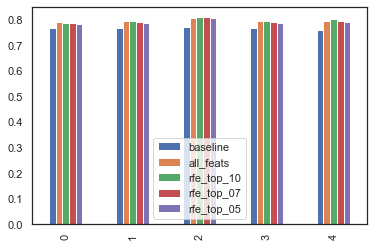

In [1285]:
plt.figure(figsize=(12,8))
results_data.plot(y=["baseline", "all_feats", "rfe_top_10","rfe_top_07","rfe_top_05"], kind="bar")


Here, we can see that the model based on RFE is giving the best result for each fold especially top 10 features